# AnanseScanpy vignette for multiomics PBMC dataset

PBMC multiomics datasets scanpy objects (anndata) generated from Seurat objects with SeuratDisk.
This vignette includes the optional functions for Maelstrom (GimmeMotifs) analysis.

In [1]:
import scanpy as sc
from anansescanpy import *

sc.set_figure_params(figsize=(4, 4))

In [2]:
sc.logging.print_versions()

-----
anndata     0.8.0
scanpy      1.9.1
-----
PIL                 9.2.0
anansescanpy        0.2.3
asttokens           NA
backcall            0.2.0
beta_ufunc          NA
binom_ufunc         NA
cffi                1.15.1
colorama            0.4.6
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.2
debugpy             1.6.3
decorator           5.1.1
defusedxml          0.7.1
entrypoints         0.4
executing           1.2.0
h5py                3.7.0
hypergeom_ufunc     NA
ipykernel           6.17.1
ipython_genutils    0.2.0
jedi                0.18.1
joblib              1.2.0
jupyter_server      1.23.2
kiwisolver          1.4.4
llvmlite            0.39.1
matplotlib          3.6.2
matplotlib_inline   0.1.6
mpl_toolkits        NA
natsort             8.2.0
nbinom_ufunc        NA
ncf_ufunc           NA
numba               0.56.3
numpy               1.23.4
packaging           21.3
pandas              1.5.1
parso               0.8.3
pexpect             4.8.0
picklesha

In [3]:
# Fill in the directories where the h5ad rna and atac objects are located
atac_PBMC = sc.read("atac_PBMC.h5ad")
rna_PBMC= sc.read("rna_PBMC.h5ad")

# Notes: the default assays for atac_PBMC and rna_PBMC are "peaks" and "counts" respectively

# Nessesary pre-processing from converted Seurat object
rna_PBMC.obs['predicted.id'] = rna_PBMC.obs['predicted.id'].str.replace(' ', '-')
atac_PBMC.obs['predicted.id'] = atac_PBMC.obs['predicted.id'].str.replace(' ', '-')

In [4]:
# Run the functions in python:
outputdir="AnanseScanpy_outs/"
contrasts=["B-naive_B-memory","B-memory_B-naive","B-naive_CD14-Mono"
           ,"CD14-Mono_B-naive"]
minimal=25
export_CPM_scANANSE(anndata=rna_PBMC,min_cells=minimal,outputdir=outputdir
                    ,cluster_id="predicted.id")
export_ATAC_scANANSE(anndata=atac_PBMC,min_cells=minimal,outputdir=outputdir
                     ,cluster_id="predicted.id")
config_scANANSE(anndata=rna_PBMC,min_cells=minimal,outputdir=outputdir,
                cluster_id="predicted.id",additional_contrasts=contrasts)
DEGS_scANANSE(anndata=rna_PBMC,min_cells=minimal,outputdir=outputdir,
              cluster_id="predicted.id",additional_contrasts=contrasts)

/vol/mbconda/julian/envs/AnanseScanpy/lib/python3.10/site-packages/anndata/_core/raw.py:139: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return anndata.AnnData(


gather data from CD4-Naive with 1414 cells
gather data from CD4-TCM with 1592 cells
gather data from CD8-Naive with 1496 cells
gather data from CD16-Mono with 527 cells
gather data from NK with 492 cells
gather data from Treg with 160 cells
gather data from CD14-Mono with 3095 cells
gather data from CD8-TCM with 73 cells
gather data from B-intermediate with 351 cells
gather data from cDC2 with 168 cells
gather data from B-memory with 159 cells
gather data from CD4-TEM with 172 cells
gather data from MAIT with 121 cells
gather data from CD8-TEM with 664 cells
gather data from B-naive with 424 cells
gather data from gdT with 164 cells
gather data from pDC with 110 cells
gather data from HSPC with 26 cells
gather data from CD4-Naive with 1414 cells
gather data from CD4-TCM with 1592 cells
gather data from CD8-Naive with 1496 cells
gather data from CD16-Mono with 527 cells
gather data from NK with 492 cells
gather data from Treg with 160 cells
gather data from CD14-Mono with 3095 cells
gat

In [5]:
# Export ATAC data for maelstrom analysis (see methods scANANSE paper)
export_ATAC_maelstrom(anndata=atac_PBMC,min_cells=minimal,outputdir=outputdir
                     ,cluster_id="predicted.id")

gather data from CD4-Naive with 1414 cells
gather data from CD4-TCM with 1592 cells
gather data from CD8-Naive with 1496 cells
gather data from CD16-Mono with 527 cells
gather data from NK with 492 cells
gather data from Treg with 160 cells
gather data from CD14-Mono with 3095 cells
gather data from CD8-TCM with 73 cells
gather data from B-intermediate with 351 cells
gather data from cDC2 with 168 cells
gather data from B-memory with 159 cells
gather data from CD4-TEM with 172 cells
gather data from MAIT with 121 cells
gather data from CD8-TEM with 664 cells
gather data from B-naive with 424 cells
gather data from gdT with 164 cells
gather data from pDC with 110 cells
gather data from HSPC with 26 cells
large dataframe detected, selecting top variable rows n = 100000
if entire dataframe is required, add select_top_rows = False as a parameter
or change ammount of rows via the n_top_rows parameter


In [6]:
# Import the maelstrom results to a dataframe and into the scanpy object
df_mael = import_scanpy_maelstrom(anndata=rna_PBMC,cluster_id="predicted.id",
                       maelstrom_dir="AnanseScanpy_outs/maelstrom/",return_df = True)

/vol/mbconda/julian/envs/AnanseScanpy/lib/python3.10/site-packages/anndata/_core/anndata.py:798: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  value_idx = self._prep_dim_index(value.index, attr)


In [7]:
# Make a dataframe with the values per cluster from the scanpy object, like df_mael above:
df_mael2 = per_cluster_df(anndata=rna_PBMC,assay="maelstrom",cluster_id = "predicted.id")  

In [8]:
# Link motifs to transcription factors specified with "combine_motifs" parameter. 
# Here, the means of all motifs will be used (other options include: max_var and max_cor; see help)

rna_PBMC=Maelstrom_Motif2TF(anndata=rna_PBMC,
                   cluster_id = 'predicted.id',
                   maelstrom_dir= "AnanseScanpy_outs/maelstrom/",combine_motifs="max_cor")

# Note: if you already have a dataframe from maelstrom as input, the function will run faster

loading maelstrom values from maelstrom assay using the cluster identifier predicted.id


/vol/mbconda/julian/envs/AnanseScanpy/lib/python3.10/site-packages/anndata/_core/raw.py:139: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return anndata.AnnData(


Seurat NormalizeData with default settings will be run on all the genes
Only keep motif-TF combinations with an R > 0.3
total length m2f_df_unique 279
Selecting correlating TFs
total m2f: 164
Motif best (absolute)correlated to expression is selected per TF
Selecting anticorrelating TFs
total m2f: 115
Motif best (absolute)correlated to expression is selected per TF


/vol/mbconda/julian/envs/AnanseScanpy/lib/python3.10/site-packages/anndata/_core/anndata.py:798: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  value_idx = self._prep_dim_index(value.index, attr)
/vol/mbconda/julian/envs/AnanseScanpy/lib/python3.10/site-packages/anndata/_core/anndata.py:798: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  value_idx = self._prep_dim_index(value.index, attr)
/vol/mbconda/julian/envs/AnanseScanpy/lib/python3.10/site-packages/anndata/_core/anndata.py:798: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  value_idx = self._prep_dim_index(value.index, attr)
/vol/mbconda/julian/envs/AnanseScanpy/lib/python3.10/site-packages/anndata/_core/anndata.py:798: UserWarning: 
AnnData expects .obs.index to contain st

In [9]:
# If you want to see which motif corresponds with which factor, you can extract the metadata
# Here the anti-correlation assay is shown (TFanticor); other option includes TFcor_means
# Based on your used "combine_motifs" parameter; you can change below to rna_PBMC.uns["TFanticor_max_var"]
# Here, the max_cor is the GM.5.0.Ets.0015 motif used factor ETS1
rna_PBMC.uns["TFanticor_max_cor"]

,abscor,Motif,Factor,cor,var
0,0.301583,GM.5.0.IRF.0009,SPI1,-0.301583,7.027371
3,0.306479,GM.5.0.Paired_box.0013,AHR,-0.306479,1.991885
5,0.310215,GM.5.0.bZIP.0079,FOS,-0.310215,1.202970
7,0.312816,GM.5.0.IRF.0009,TCF12,-0.312816,7.027371
8,0.314340,GM.5.0.Rel.0009,HIVEP1,-0.314340,4.409965
...,...,...,...,...,...
255,0.780393,GM.5.0.Nuclear_receptor.0011,NR3C1,-0.780393,1.321586
263,0.829559,GM.5.0.C2H2_ZF.0190,SP3,-0.829559,4.522588
264,0.833679,GM.5.0.C2H2_ZF.0190,PBX3,-0.833679,4.522588
268,0.841159,GM.5.0.C2H2_ZF.0195,ETS1,-0.841159,3.124414


In [10]:
# Generate a UMAP if not performed already during pre-processing
adata=rna_PBMC
adata.raw = adata
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.pca(adata)
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=30)
sc.tl.umap(adata)

/vol/mbconda/julian/envs/AnanseScanpy/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


After running ANANSNAKE you can import back the results to the scanpy object 
and visualize a heatmap of the top factors with seaborn

In [11]:
# Import the Ananse results to the scanpy object and a separate dataframe as well
df_influence=import_scanpy_scANANSE(anndata=rna_PBMC,cluster_id="predicted.id",
                       anansnake_inf_dir="AnanseScanpy_outs/influence/")

/vol/mbconda/julian/envs/AnanseScanpy/lib/python3.10/site-packages/anndata/_core/anndata.py:798: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  value_idx = self._prep_dim_index(value.index, attr)


/vol/mbconda/julian/envs/AnanseScanpy/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


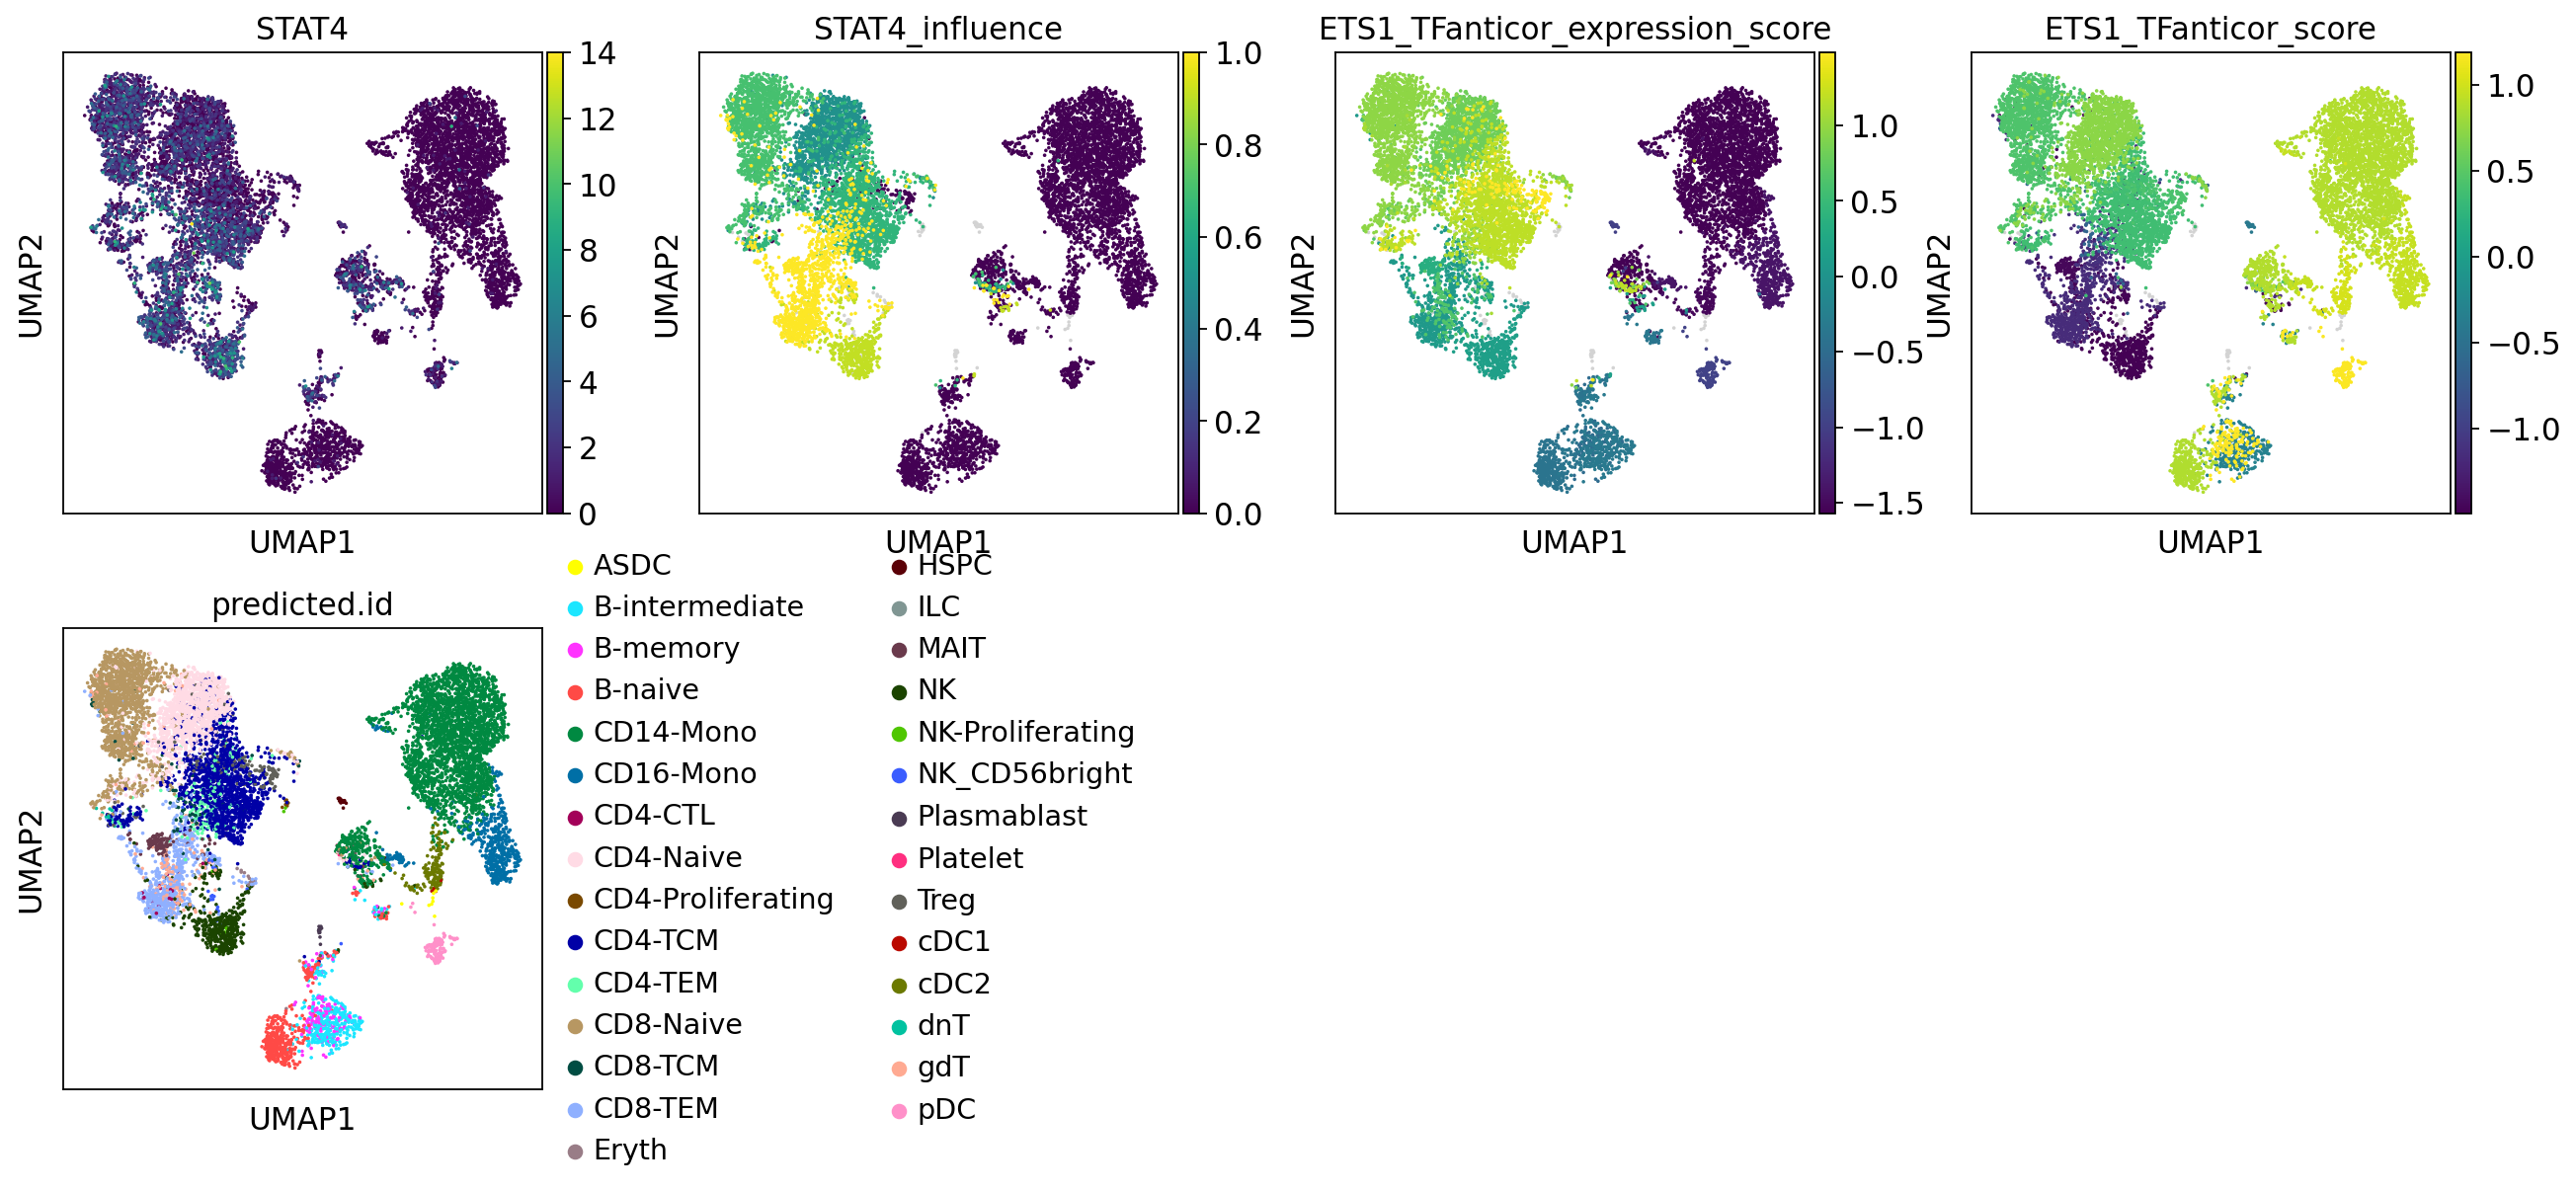

/vol/mbconda/julian/envs/AnanseScanpy/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


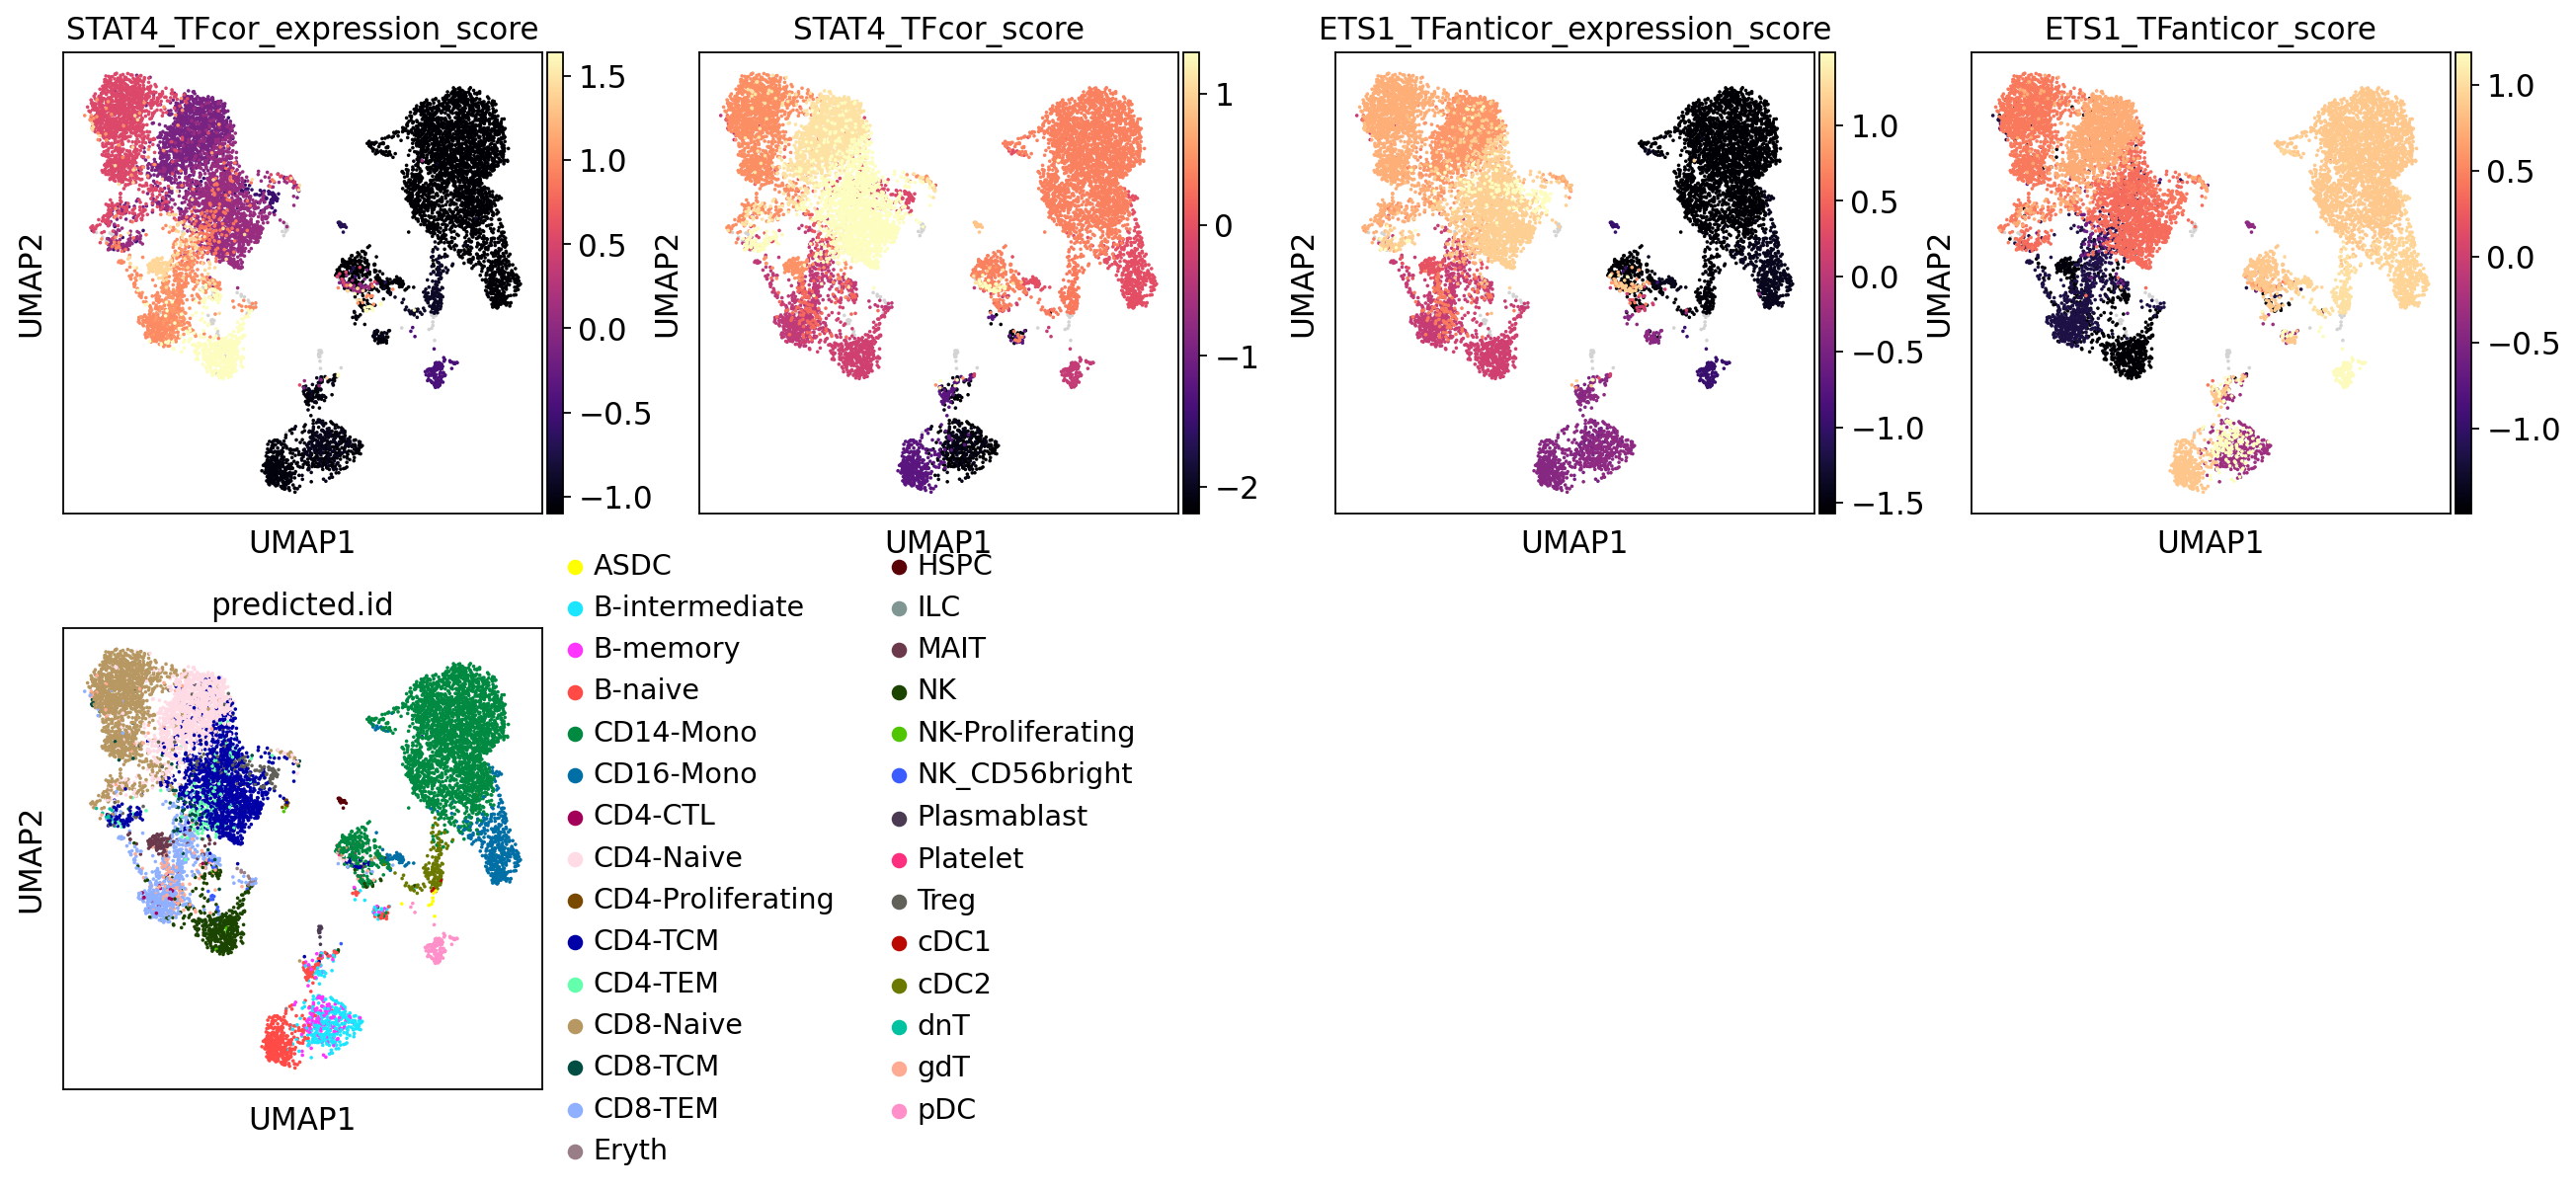

In [12]:
# Show absolute expression and influence values of transcription factors on the UMAP
sc.pl.umap(adata, color=["STAT4","STAT4_influence","ETS1_TFanticor_expression_score","ETS1_TFanticor_score","predicted.id"], cmap="viridis")

# Optional: show relative expression and maelstrom values of transcription factors on the UMAP
sc.pl.umap(adata, color=["STAT4_TFcor_expression_score","STAT4_TFcor_score","ETS1_TFanticor_expression_score","ETS1_TFanticor_score","predicted.id"], cmap="magma")

# For STAT4, you can see that the relative expression corresponds with motif enrichment
# For ETS1, a predicted repressive factor, you can see that higher relative expression 
# corresponds with a relative inaccessible motif

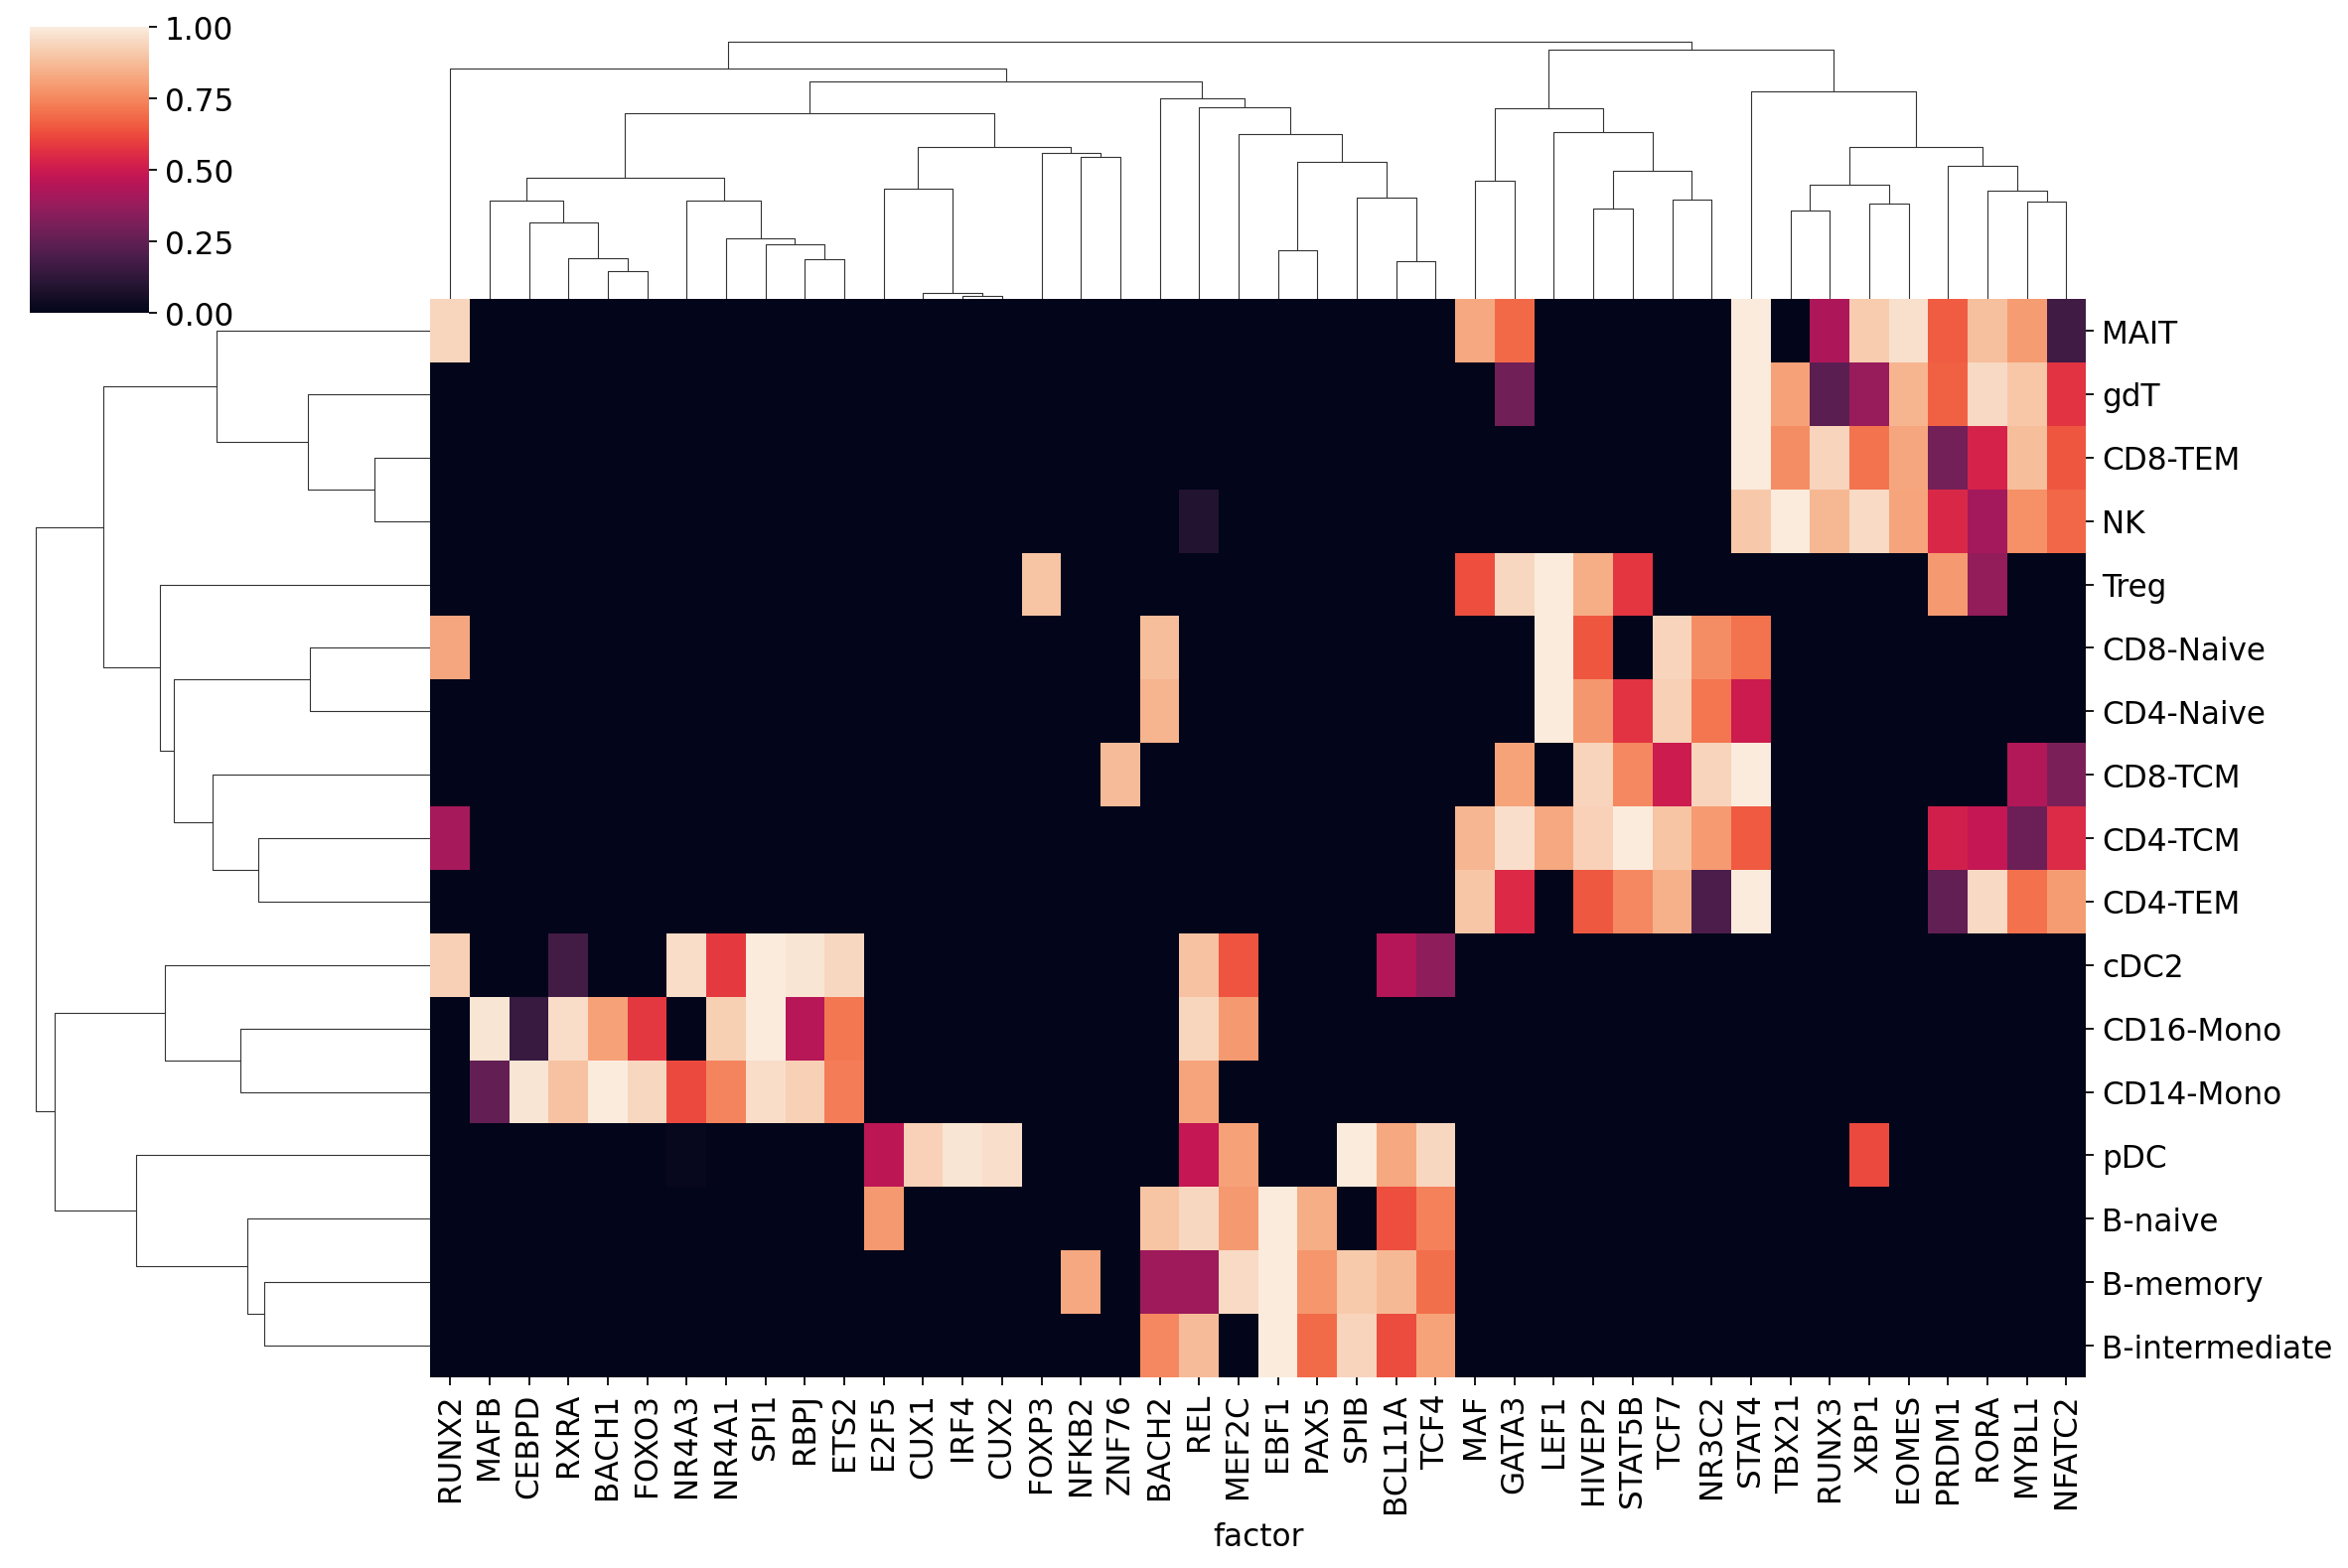

In [13]:
# Make a heatmap of the top 5 transcription factors for each population
import seaborn as sns
top=5

df_t = df_influence.transpose()
factors_topn = []
for i in df_t:
    df_sub=df_t[i]
    test = df_sub.sort_values(ascending=False)
    factors_topn.append(list(test[0:top].index))
    
factors_topn=[j for i in factors_topn for j in i]
factors_topn=set(factors_topn)

selected_df = df_influence[list(factors_topn)]
sns.clustermap(selected_df, annot=False, figsize=(15, 10))

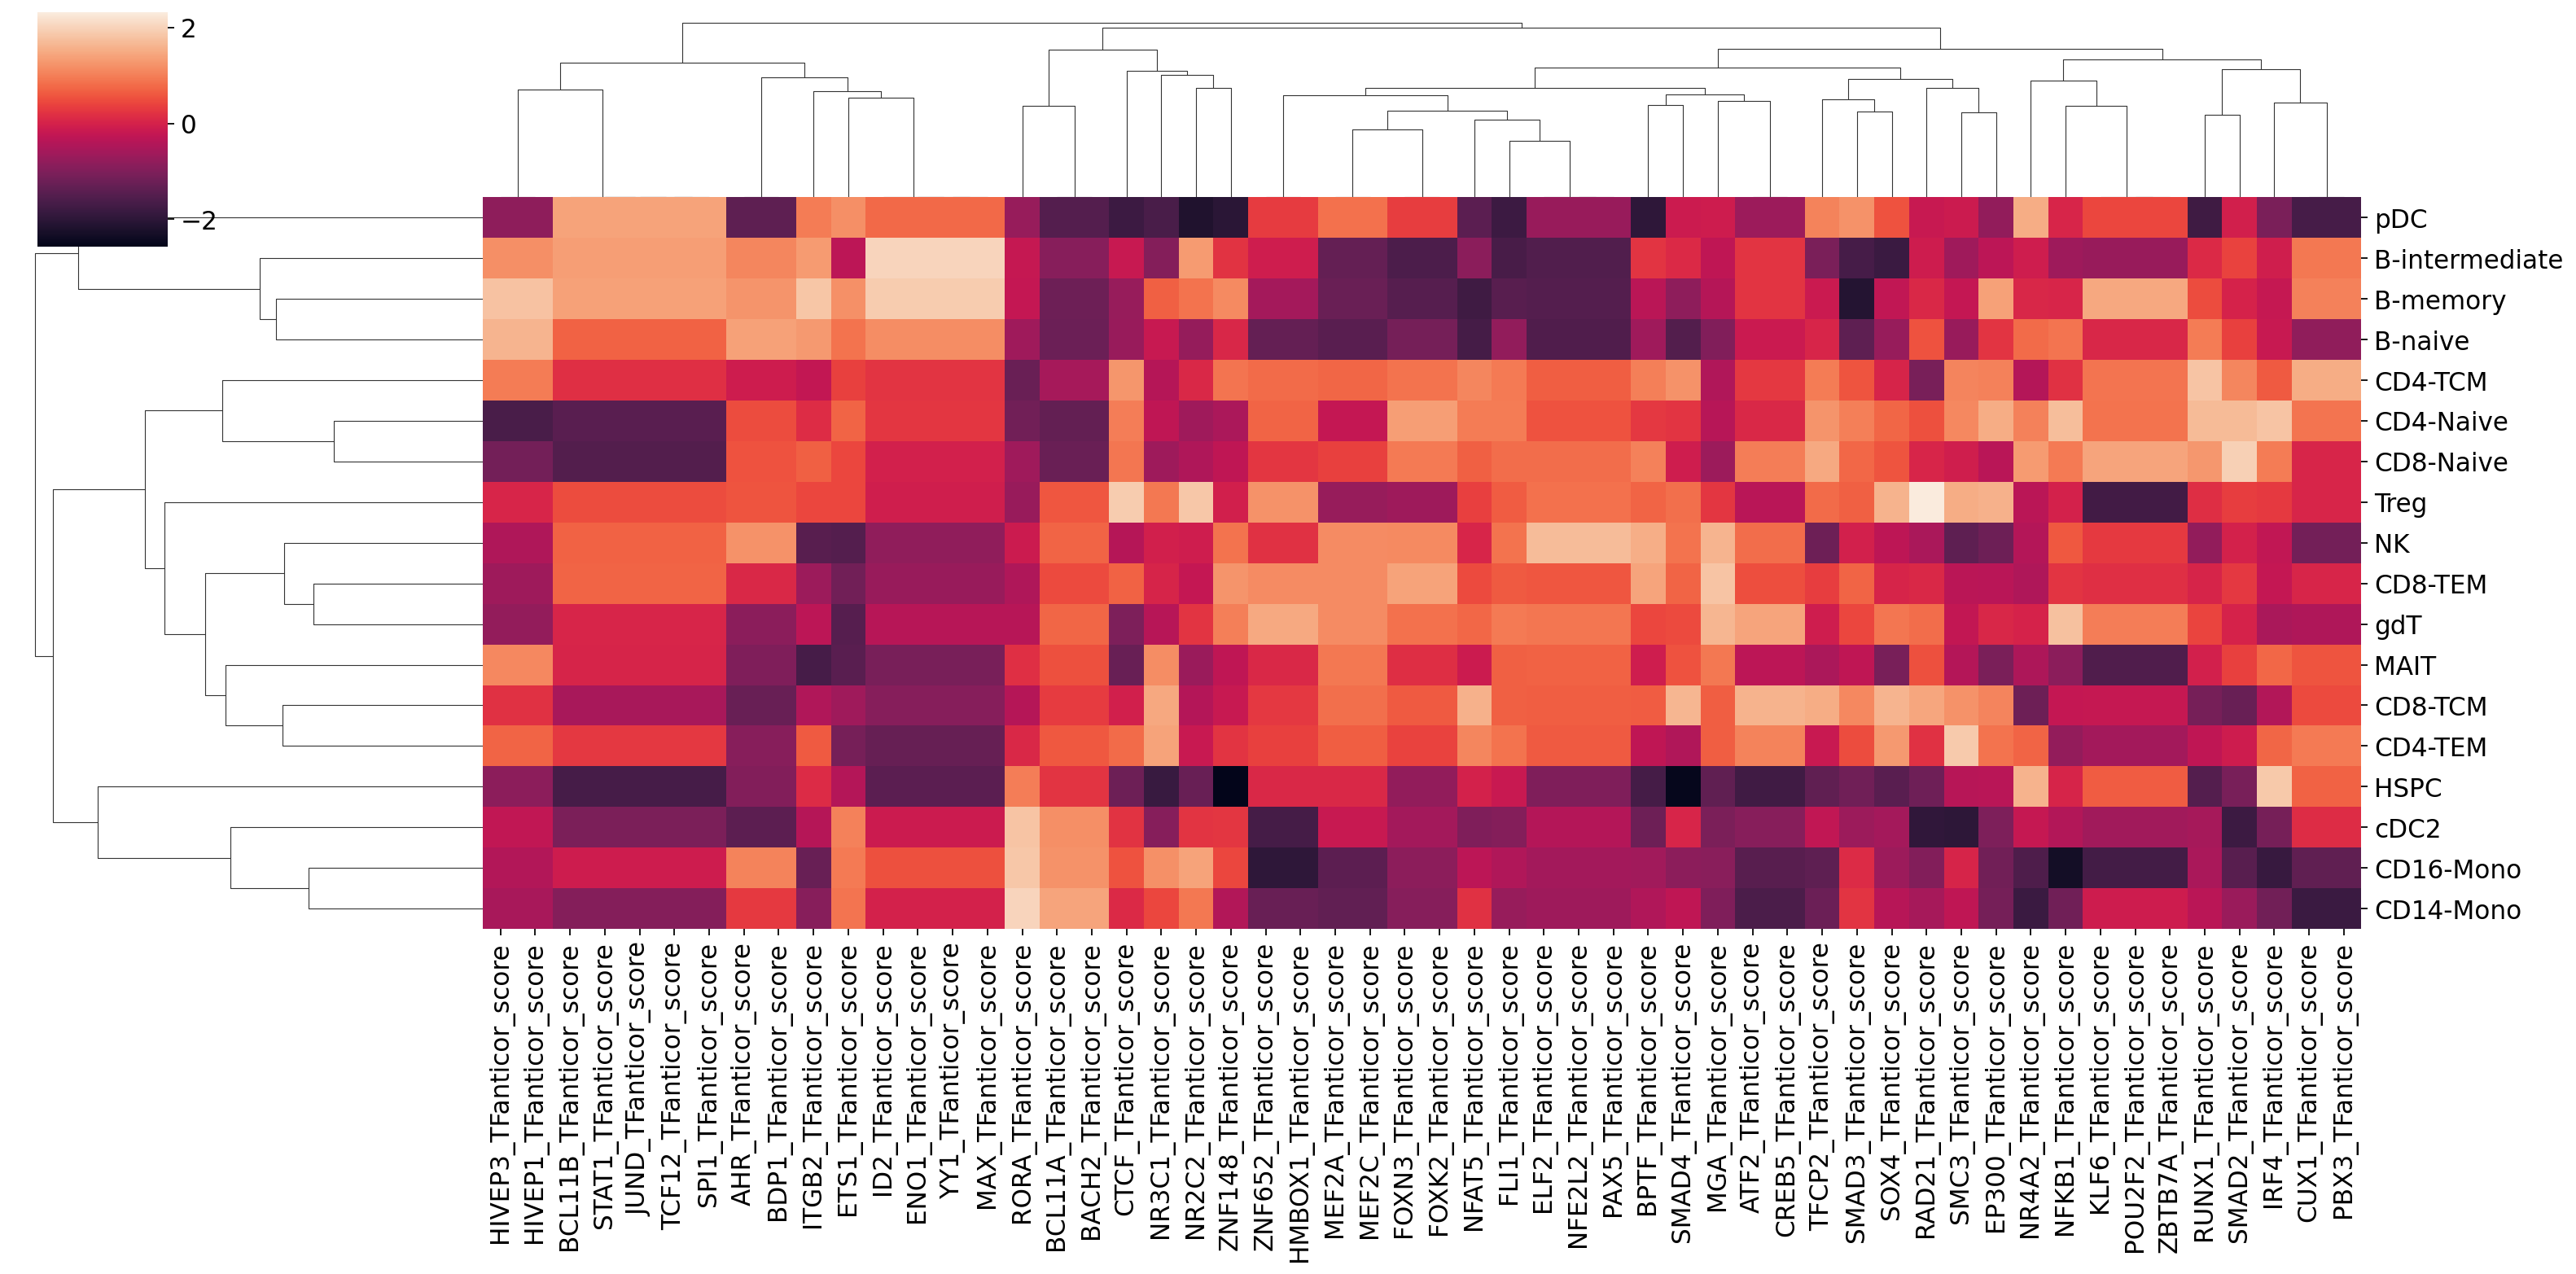

In [14]:
# Make a dataframe with the values of the anti-correlation per cluster from the scanpy object:
df_anticor = per_cluster_df(anndata=rna_PBMC,assay="TFanticor_score",cluster_id = "predicted.id")

# Visualize the top 5 anticorrelating factors in a heatmap 
top=5

df_t = df_anticor.transpose()
factors_topn = []
for i in df_t:
    df_sub=df_t[i]
    test = df_sub.sort_values(ascending=True)
    factors_topn.append(list(test[0:top].index))
    
factors_topn=[j for i in factors_topn for j in i]
factors_topn=set(factors_topn)

selected_df = df_anticor[list(factors_topn)]
sns.clustermap(selected_df, annot=False, figsize=(20, 10))

# Note: the ETS1 motif shows high repression score for CD8 like cell types, like on the UMAP above

# Note: PAX5 is an important repressive factor in B-cells, also indiciated in our heatmap
# Source: Delogu A, Schebesta A, Sun Q, Aschenbrenner K, Perlot T, Busslinger M. 
# Gene repression by Pax5 in B cells is essential for blood cell homeostasis and is reversed in plasma cells. 
# Immunity. 2006 Mar;24(3):269-81. doi: 10.1016/j.immuni.2006.01.012. PMID: 16546096.

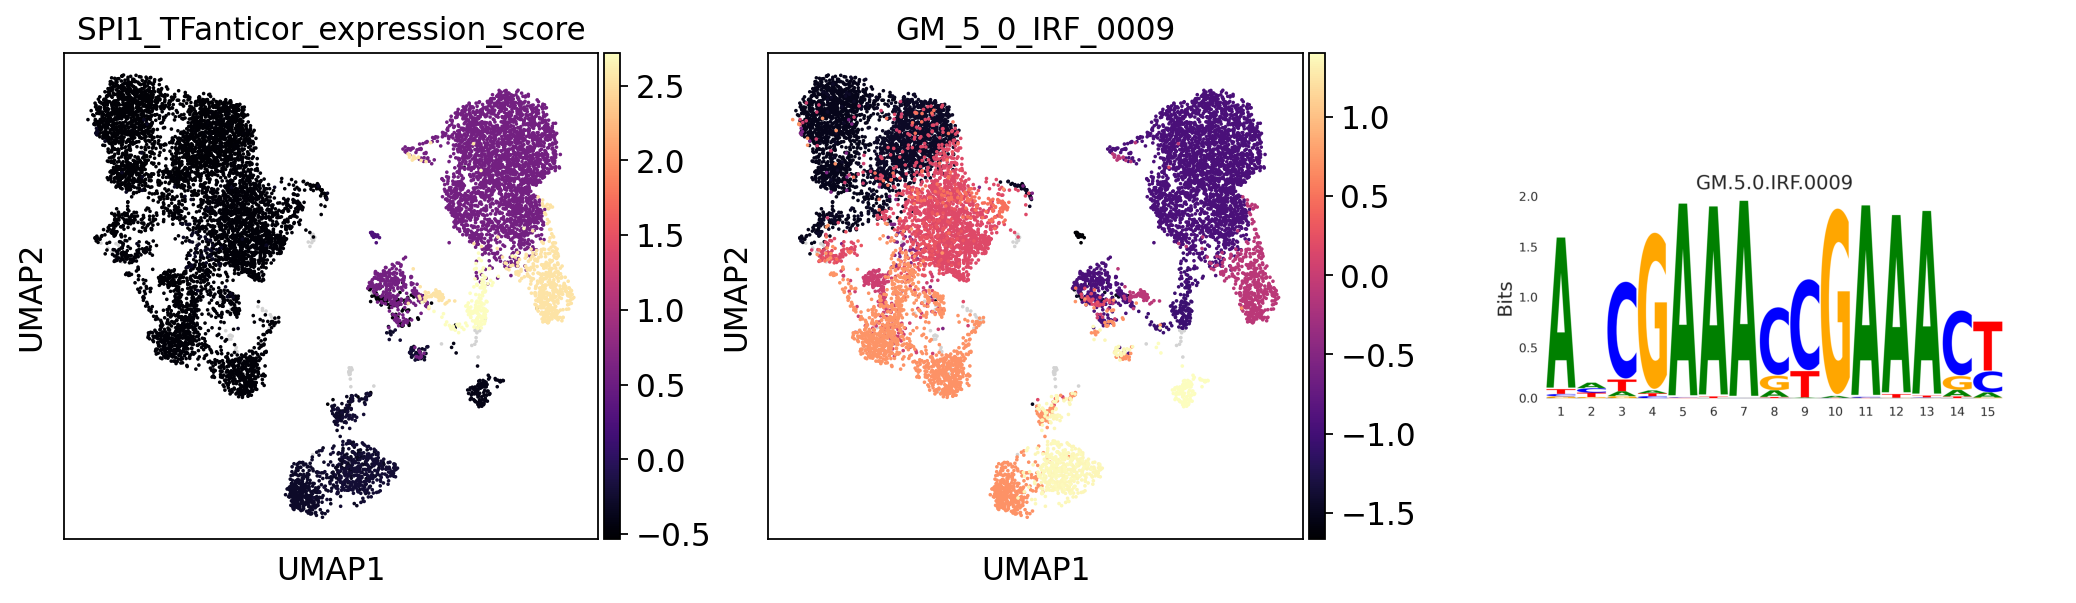

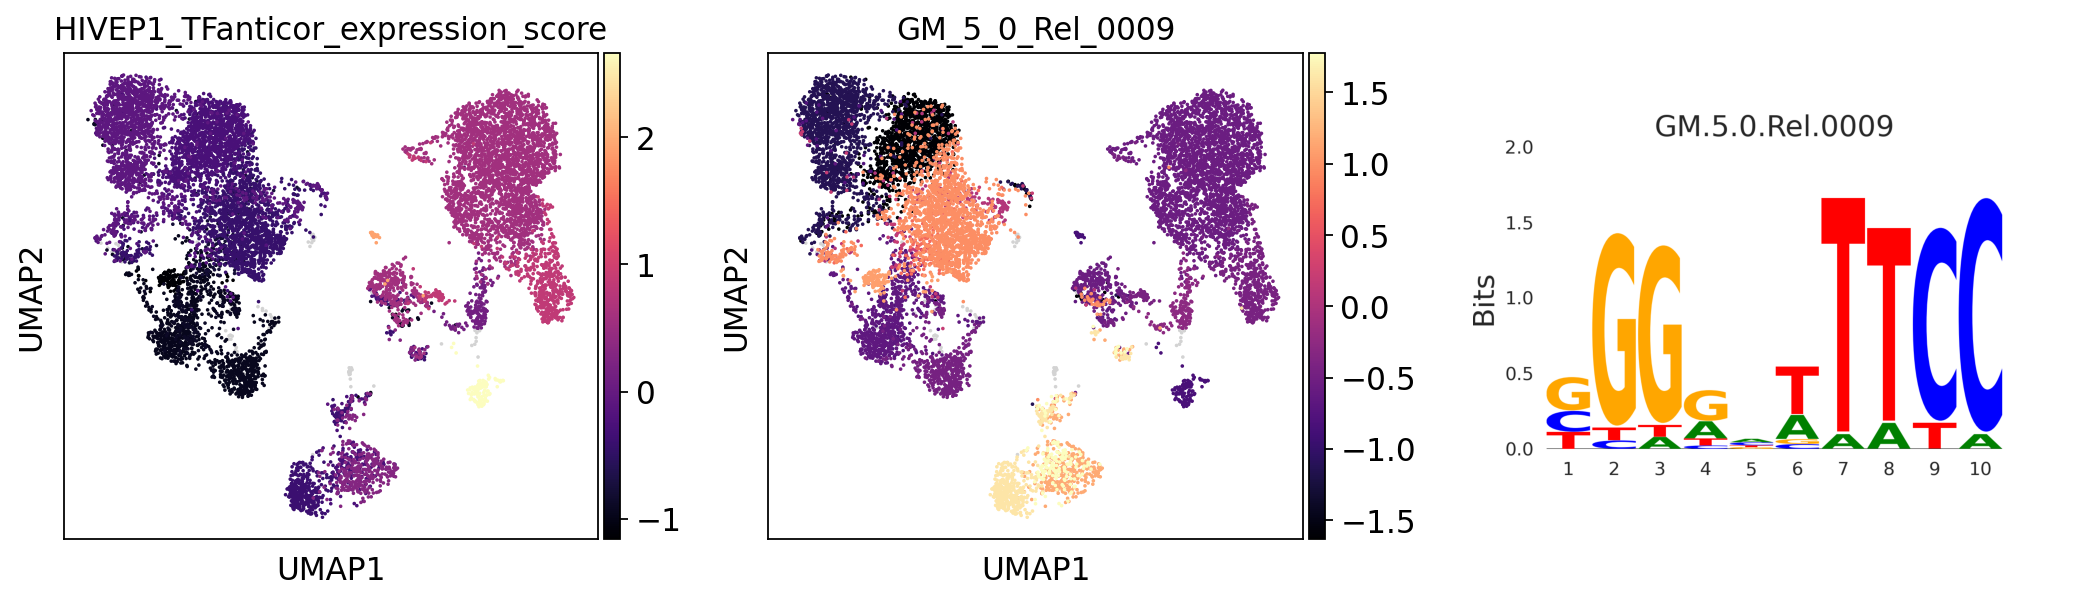

In [15]:
# Showing the negative correlating factors of interest with "max_cor" as the default "combine_motifs" parameter
factors = ["SPI1","HIVEP1"]
Factor_Motif_Plot(rna_PBMC,factor_list=factors,logo_dir='AnanseScanpy_outs/maelstrom/logos/',assay_maelstrom = 'TFanticor')